## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation, Dense

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
#dropout, regularizers, batch-normalization
'''
1. no bn no r no drp
2. w/ drop out
3. w/ bn
4. w/ r1
5. w/ r2
'''
def build_mlp1(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.5):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp4(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
def build_mlp5(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-8):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp6(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE =  256
MOMENTUM = 0.95
name_tag = ['None','Dropout','BatchNormal', 'L1Reg', 'L2Reg', 'L1L2Reg']

In [7]:
results = {}
for name in name_tag:
    keras.backend.clear_session()
    print("Experiment with %s" % (name))
    if name == 'None':
        model = build_mlp1(input_shape=x_train.shape[1:])
    elif name == 'Dropout':
        model = build_mlp2(input_shape=x_train.shape[1:])
    elif name == 'BatchNormal':
        model = build_mlp3(input_shape=x_train.shape[1:])
    elif name == 'L1Reg':
        model = build_mlp4(input_shape=x_train.shape[1:])
    elif name == 'L2Reg':
        model = build_mlp5(input_shape=x_train.shape[1:])
    else:
        model = build_mlp6(input_shape=x_train.shape[1:])
        
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-%s" % str(name)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with None
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [===================

50000/50000 [==============================] - 6s 119us/step - loss: 0.8854 - accuracy: 0.6884 - val_loss: 1.3606 - val_accuracy: 0.5403
Epoch 49/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.8723 - accuracy: 0.6914 - val_loss: 1.4192 - val_accuracy: 0.5328
Epoch 50/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.8620 - accuracy: 0.6962 - val_loss: 1.4594 - val_accuracy: 0.5225
Epoch 51/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.8473 - accuracy: 0.7038 - val_loss: 1.4112 - val_accuracy: 0.5305
Epoch 52/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.8404 - accuracy: 0.7028 - val_loss: 1.3900 - val_accuracy: 0.5409
Epoch 53/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.8228 - accuracy: 0.7098 - val_loss: 1.4254 - val_accuracy: 0.5315
Epoch 54/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.8111 - accuracy: 0.7150 - val

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 133us/step - loss: 2.3100 - accuracy: 0.1383 - val_loss: 2.1800 - val_accuracy: 0.2492
Epoch 2/100
50000/50000 [==============================] - 7s 130us/step - loss: 2.1726 - accuracy: 0.1882 - val_loss: 2.0515 - val_accuracy: 0.2836
Epoch 3/100
50000/50000 [==============================] - 7s 131us/step - loss: 2.0922 - accuracy: 0.2193 - val_loss: 1.9812 - val_accuracy: 0.3124
Epoch 4/100
50000/50000 [==============================] - 7s 131us/step - loss: 2.0456 - accuracy: 0.2415 - val_loss: 1.9348 - val_accuracy: 0.3263
Epoch 5/100
50000/50000 [==============================] - 7s 131us/step - loss: 2.0061 - accuracy: 0.2585 - val_loss: 1.8900 - val_accuracy: 0.3429
Epoch 6/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.9796 - accuracy: 0.2711 - val_loss: 1.8642 - val_accuracy: 0.3525
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 132us/step - loss: 1.5759 - accuracy: 0.4356 - val_loss: 1.4707 - val_accuracy: 0.4759
Epoch 56/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.5702 - accuracy: 0.4372 - val_loss: 1.4554 - val_accuracy: 0.4808
Epoch 57/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.5625 - accuracy: 0.4401 - val_loss: 1.4698 - val_accuracy: 0.4726
Epoch 58/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.5645 - accuracy: 0.4383 - val_loss: 1.4522 - val_accuracy: 0.4857
Epoch 59/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.5608 - accuracy: 0.4394 - val_loss: 1.4427 - val_accuracy: 0.4872
Epoch 60/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.5582 - accuracy: 0.4393 - val_loss: 1.4551 - val_accuracy: 0.4809
Epoch 61/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.5510 - accuracy: 0.4429 - val

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.8676 - accuracy: 0.3598 - val_loss: 1.7722 - val_accuracy: 0.3818
Epoch 2/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.5495 - accuracy: 0.4586 - val_loss: 1.5913 - val_accuracy: 0.4423
Epoch 3/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.4455 - accuracy: 0.4932 - val_loss: 1.6294 - val_accuracy: 0.4275
Epoch 4/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.3705 - accuracy: 0.5221 - val_loss: 1.6064 - val_accuracy: 0.4384
Epoch 5/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.3128 - accuracy: 0.5406 - val_loss: 1.5266 - val_accuracy: 0.4602
Epoch 6/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.2639 - accuracy: 0.5577 - val_loss: 1.4733 - val_accuracy: 0.4841
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 134us/step - loss: 0.1408 - accuracy: 0.9633 - val_loss: 2.6188 - val_accuracy: 0.4633
Epoch 56/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.1306 - accuracy: 0.9669 - val_loss: 2.7081 - val_accuracy: 0.4610
Epoch 57/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.1254 - accuracy: 0.9675 - val_loss: 2.5749 - val_accuracy: 0.4741
Epoch 58/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.1156 - accuracy: 0.9720 - val_loss: 2.6769 - val_accuracy: 0.4695
Epoch 59/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.1171 - accuracy: 0.9713 - val_loss: 2.8663 - val_accuracy: 0.4562
Epoch 60/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.1054 - accuracy: 0.9756 - val_loss: 2.6543 - val_accuracy: 0.4645
Epoch 61/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.1012 - accuracy: 0.9754 - val

50000/50000 [==============================] - 7s 143us/step - loss: 19.1883 - accuracy: 0.1199 - val_loss: 7.3253 - val_accuracy: 0.1000
Epoch 3/100
50000/50000 [==============================] - 7s 145us/step - loss: 4.1340 - accuracy: 0.0992 - val_loss: 2.6542 - val_accuracy: 0.1000
Epoch 4/100
50000/50000 [==============================] - 7s 145us/step - loss: 2.4869 - accuracy: 0.0959 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 5/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 6/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.4626 - accuracy: 0.0964 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 7/100
50000/50000 [==============================] - 7s 140us/step - loss: 2.4626 - accuracy: 0.0993 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 8/100
50000/50000 [==============================] - 7s 140us/step - loss: 2.4626 - accuracy: 0.0994 - val_loss

Epoch 57/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 58/100
50000/50000 [==============================] - 8s 151us/step - loss: 2.4626 - accuracy: 0.0967 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 59/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 60/100
50000/50000 [==============================] - 7s 142us/step - loss: 2.4626 - accuracy: 0.0986 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 61/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 62/100
50000/50000 [==============================] - 7s 142us/step - loss: 2.4626 - accuracy: 0.0980 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 63/100
50000/50000 [==============================] - 7s 142us/step - loss: 2.4626 - accuracy:

50000/50000 [==============================] - 7s 141us/step - loss: 1.6571 - accuracy: 0.4175 - val_loss: 1.6389 - val_accuracy: 0.4205
Epoch 5/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.6082 - accuracy: 0.4348 - val_loss: 1.5949 - val_accuracy: 0.4384
Epoch 6/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5677 - accuracy: 0.4491 - val_loss: 1.5597 - val_accuracy: 0.4480
Epoch 7/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5335 - accuracy: 0.4603 - val_loss: 1.5384 - val_accuracy: 0.4576
Epoch 8/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5029 - accuracy: 0.4728 - val_loss: 1.5236 - val_accuracy: 0.4618
Epoch 9/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.4750 - accuracy: 0.4811 - val_loss: 1.4861 - val_accuracy: 0.4723
Epoch 10/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.4498 - accuracy: 0.4896 - val_loss

Epoch 59/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.7641 - accuracy: 0.7329 - val_loss: 1.6516 - val_accuracy: 0.4978
Epoch 60/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.7526 - accuracy: 0.7366 - val_loss: 1.4896 - val_accuracy: 0.5220
Epoch 61/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.7329 - accuracy: 0.7454 - val_loss: 1.5232 - val_accuracy: 0.5178
Epoch 62/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.7260 - accuracy: 0.7472 - val_loss: 1.4667 - val_accuracy: 0.5292
Epoch 63/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.7164 - accuracy: 0.7505 - val_loss: 1.5252 - val_accuracy: 0.5209
Epoch 64/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.7019 - accuracy: 0.7552 - val_loss: 1.5929 - val_accuracy: 0.5106
Epoch 65/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.6949 - accuracy:

50000/50000 [==============================] - 8s 160us/step - loss: 9.1823 - accuracy: 0.4097 - val_loss: 8.5799 - val_accuracy: 0.4107
Epoch 7/100
50000/50000 [==============================] - 8s 161us/step - loss: 8.0450 - accuracy: 0.4167 - val_loss: 7.5303 - val_accuracy: 0.4203
Epoch 8/100
50000/50000 [==============================] - 8s 160us/step - loss: 7.0770 - accuracy: 0.4207 - val_loss: 6.6497 - val_accuracy: 0.4154
Epoch 9/100
50000/50000 [==============================] - 8s 160us/step - loss: 6.2525 - accuracy: 0.4264 - val_loss: 5.8795 - val_accuracy: 0.4238
Epoch 10/100
50000/50000 [==============================] - 8s 162us/step - loss: 5.5493 - accuracy: 0.4287 - val_loss: 5.2433 - val_accuracy: 0.4183
Epoch 11/100
50000/50000 [==============================] - 8s 160us/step - loss: 4.9522 - accuracy: 0.4320 - val_loss: 4.6839 - val_accuracy: 0.4341
Epoch 12/100
50000/50000 [==============================] - 8s 159us/step - loss: 4.4436 - accuracy: 0.4340 - val_lo

Epoch 61/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.7194 - accuracy: 0.4897 - val_loss: 1.7683 - val_accuracy: 0.4747
Epoch 62/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.7204 - accuracy: 0.4907 - val_loss: 1.7737 - val_accuracy: 0.4698
Epoch 63/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.7169 - accuracy: 0.4924 - val_loss: 1.7553 - val_accuracy: 0.4795
Epoch 64/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.7142 - accuracy: 0.4933 - val_loss: 1.7534 - val_accuracy: 0.4810
Epoch 65/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.7144 - accuracy: 0.4910 - val_loss: 1.7526 - val_accuracy: 0.4768
Epoch 66/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.7132 - accuracy: 0.4921 - val_loss: 1.7530 - val_accuracy: 0.4827
Epoch 67/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.7085 - accuracy:

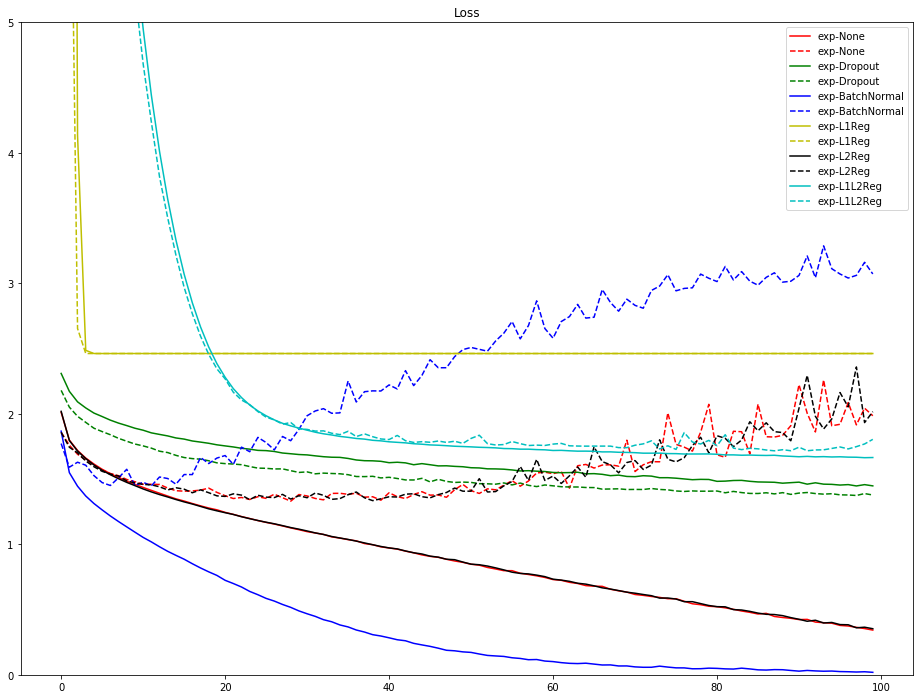

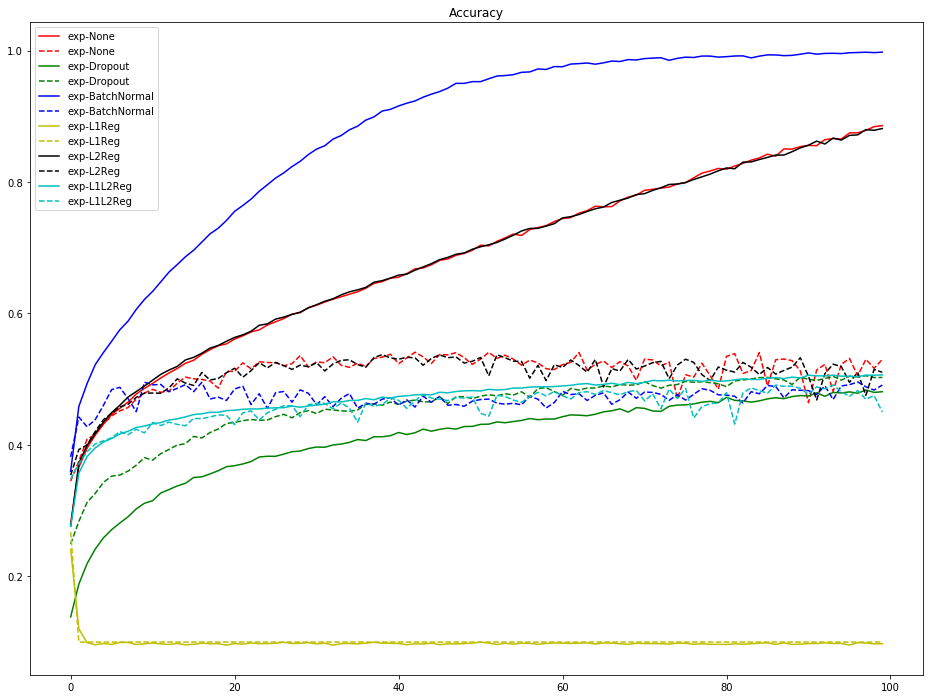

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "k", "c"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()